In [ ]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### K-Means Using Pandas and Numpy

In [ ]:
k = 3

X, y = make_blobs(n_samples=10000, n_features=2, 
                  centers=k, random_state=42,
                  cluster_std=2)

In [ ]:
def create_centroids(data_x, k):
    
    min_data_x = np.min(data_x[:, 0])
    max_data_x = np.max(data_x[:, 0])
    min_data_y = np.min(data_x[:, 1])
    max_data_y = np.max(data_x[:, 1])

    random_x_list = [np.random.uniform(min_data_x, max_data_x) for each in range(k)]

    random_y_list = [np.random.uniform(min_data_y, max_data_y) for each in range(k)]

    zipped_list = list(zip(random_x_list, random_y_list))
        
    return np.array(zipped_list)

centroids = create_centroids(data_x=X, k=3)

In [ ]:
df_points = pd.DataFrame(X, columns=['X_Value', 'Y_Value'])

df_points['ED_1'] = (((df_points['X_Value'] - centroids[0][0])**2) + \
                    ((df_points['Y_Value'] - centroids[0][1])**2))**(0.5)

df_points['ED_2'] = (((df_points['X_Value'] - centroids[1][0])**2) + \
                    ((df_points['Y_Value'] - centroids[1][1])**2))**(0.5)

df_points['ED_3'] = (((df_points['X_Value'] - centroids[2][0])**2) + \
                    ((df_points['Y_Value'] - centroids[2][1])**2))**(0.5)

df_points['CLUSTER_ID'] = df_points[['ED_1', 'ED_2', 'ED_3']].idxmin(axis=1)

In [ ]:
df_points.head()

In [ ]:
df_points.CLUSTER_ID.value_counts()

In [ ]:
new_clusters = [[df_points[df_points['CLUSTER_ID'] == 'ED_1']['X_Value'].mean(), \
df_points[df_points['CLUSTER_ID'] == 'ED_1']['Y_Value'].mean()],

[df_points[df_points['CLUSTER_ID'] == 'ED_2']['X_Value'].mean(), \
df_points[df_points['CLUSTER_ID'] == 'ED_2']['Y_Value'].mean()],

[df_points[df_points['CLUSTER_ID'] == 'ED_3']['X_Value'].mean(), \
df_points[df_points['CLUSTER_ID'] == 'ED_3']['Y_Value'].mean()]]

In [ ]:
new_clusters

In [ ]:
plt.scatter(centroids[:, 0], centroids[:, 1], 
            color='red', s=75, 
            zorder=2000, alpha=1)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.title('Initial Centroids')
plt.show()

plt.scatter(np.array(new_clusters)[: , 0], 
            np.array(new_clusters)[: , 1], 
            color='red', s=75, 
            zorder=500, alpha=1)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.25)
plt.title('k-Means Clustering after One Iteration')
plt.show()

### K-Means Using Pure Numpy

In [1]:
import numpy as np

def create_centroids(data_x, k):
    
    '''    
    Inputs:
            data_x: A numpy array containing the x- and y-coordinates
            of the points in the dataset.
            
            k: Integer value of the number of centroids used.
            
    Returns: 
            A numpy array that contains the x- and y-coordinates
            of the k centroids. 
    '''
    
    min_data_x = np.min(data_x[:, 0])
    max_data_x = np.max(data_x[:, 0])
    min_data_y = np.min(data_x[:, 1])
    max_data_y = np.max(data_x[:, 1])

    random_x_list = [np.random.uniform(min_data_x, max_data_x) for each in range(k)]

    random_y_list = [np.random.uniform(min_data_y, max_data_y) for each in range(k)]

    zipped_list = list(zip(random_x_list, random_y_list))
        
    return np.array(zipped_list)

def calculate_distance(data_x, centroid_data, k):
    
    '''
    Inputs:
            data_x: A numpy array containing the x- and y-coordinates
            of the points in the dataset.
            
            centroid_data: A numpy array that contains the x- and y-coordinates
            of the three k centroids.
            
            k: Integer value of the number of centroids used.
            
    Returns: 
            A numpy array that contains the euclidean distance 
            between each data point and each of the k centroids. 
    
    '''
    
    dist_list = [(((X[:, 0] - centroid_data[each][0])**2) + \
                (X[:, 1] - centroid_data[each][1])**2)**(0.5) \
               for each in range(k)]
    return np.array(dist_list)

def new_assignment(data_x, centroids_position, k):
    
    '''
    Inputs:
            data_x: A numpy array containing the x- and y-coordinates
            of the points in the dataset.
            
            centroids_position: A numpy array containing the
            x- and y-coordinates of the k centroids.
            
            k: Integer value of the number of centroids used.
    
    Returns:
            A numpy array that contains the new cluster assignments 
            for each of the data points in the set. The assignments
            are based on the smallest euclidean distance value across
            all of the k centroids. 
    '''
    
    return calculate_distance(data_x, centroids_position, k)[:].T.argmin(axis=1)

def new_centroid(data_x, centroids_position, k):
    
    '''
    Inputs:
            data_x: A numpy array containing the x- and y-coordinates
            of the points in the dataset.
            
            centroids_position: A numpy array containing the
            x- and y-coordinates of the k centroids.
            
            k: Integer value of the number of centroids used.
            
    Returns: 
            A numpy array that contains the x- and y-coordinates 
            of the new k centroids.
    '''
    
    new_assignment_ = new_assignment(X, centroids, k)
    
    return_list_x = [data_x[new_assignment_ == each][:, 0].mean() for each in range(k)]
    return_list_y = [data_x[new_assignment_ == each][:, 1].mean() for each in range(k)]
        
    return np.array([return_list_x, return_list_y]).T

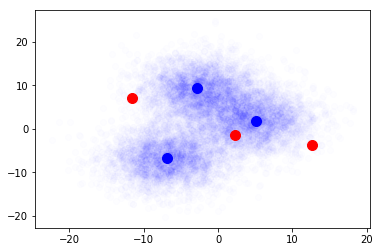

In [2]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
k = 3
X, y = make_blobs(n_samples=10000, 
                  n_features=2, 
                  centers=k, 
                  random_state=42,
                  cluster_std=4)

counter = 0
max_iter = 100
centroid_history = []
centroids = create_centroids(data_x=X, 
                             k=3)
centroid_history.append(centroids)

while counter <= max_iter:
    distances = calculate_distance(data_x=X, 
                                   centroid_data=centroid_history[-1], 
                                   k=3)
    
    assignments = new_assignment(data_x=X, 
                                 centroids_position=centroid_history[-1], 
                                 k=3)
    
    centroids = new_centroid(data_x=X, 
                             centroids_position=centroid_history[-1], 
                             k=3)
    
    centroid_history.append(centroids)
    counter += 1
    
plt.scatter(centroid_history[0][: , 0], 
            centroid_history[0][: , 1], 
            color='red', 
            s=100, 
            zorder=500, 
            alpha=1)

plt.scatter(centroid_history[-1][: , 0], 
            centroid_history[-1][: , 1],
            color='Blue', 
            s=100, 
            zorder=500, 
            alpha=1)

plt.scatter(X[:, 0], 
            X[:, 1], 
            color='blue', 
            alpha=0.0075)
plt.show()

In [13]:
for each in range(len(centroid_history)):
    print(centroid_history[each])

[[  2.21551547  -1.34193013]
 [-11.5556667    7.10928905]
 [ 12.63590732  -3.67995511]]
[[-0.59451582 -0.89499437]
 [-6.25696489  6.68368358]
 [10.4164938   0.73566274]]
[[-3.53749901 -4.1772    ]
 [-3.68928121  8.82293551]
 [ 7.7319664   2.69423389]]
[[-5.79293936 -5.99875257]
 [-2.77175092  9.21158629]
 [ 6.20476039  2.46845684]]
[[-6.54554091 -6.53207405]
 [-2.78989773  9.27430933]
 [ 5.5076685   2.00289899]]
[[-6.77306323 -6.71244786]
 [-2.81502933  9.31942717]
 [ 5.23298564  1.84935442]]
[[-6.84310093 -6.76316016]
 [-2.81479403  9.3423135 ]
 [ 5.1416411   1.79015716]]
[[-6.86991609 -6.78562577]
 [-2.81594231  9.34640308]
 [ 5.10730052  1.77212727]]
[[-6.88129477 -6.79230154]
 [-2.81418622  9.3482503 ]
 [ 5.09539659  1.76154368]]
[[-6.88284189 -6.7938939 ]
 [-2.81523666  9.35192416]
 [ 5.08962625  1.76147711]]
[[-6.88284189 -6.7938939 ]
 [-2.81719917  9.35464679]
 [ 5.08681919  1.76333206]]
[[-6.88284189 -6.7938939 ]
 [-2.8183366   9.35584635]
 [ 5.08557254  1.76442203]]
[[-6.88284